# KUR violations in a double Quantum Dot

In this example we will consider the diffusive example of studying entropy production in a double quantum dot. The system is described by the following Hamiltonian:
$$
H = \sum_{i=1}^2 \epsilon_i n_i + \sum_{j=1}^2 t_{ij} (c_i^\dagger c_j + {\rm h.c})
$$
Furthermore, we will assume that the second dot is monitored according to a QPC measurement whilst simultaneously being driven at the boundaries 
$$
\frac{d\rho}{dt} = - i [H, \rho]
$$

In [5]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from _funcs import *

def fermi(e, mu, T):
    return 1/(np.exp((e-mu)/T)+1)

In [202]:
TH, TC = 3, 1
T = (TH+TC)/2
muH, muC = 0.5*T, 1.5*T
e1, e2 = 2*T, 2.1*T
j = 0.01*T
gamma  = 0.01*T

fH = fermi(e1, muH, T)
fC = fermi(e2, muC, T)

Gamma = 0.5

# Hamiltonian
I = identity(2)
c = destroy(2)
c1 = tensor(c, I)
c2 = tensor(I, c)
n1 = c1.dag()*c1
n2 = c2.dag()*c2

H = e1*n1 + e2*n2 + j*(c1.dag()*c2 + c2.dag()*c1)
c_ops = [np.sqrt(gamma*fH)*c1, np.sqrt(gamma*fC)*c2, 
        np.sqrt(gamma*(1-fH))*c1.dag(), np.sqrt(gamma*(1-fC))*c2.dag()]
sc_ops = [np.sqrt(Gamma)*n2]

rho_ss = steadystate(H, cops)
rho_ss = tensor(fock_dm(2, 0), fock_dm(2, 1))
K = 2*np.sqrt(Gamma)*expect(n2, rho_ss)

rho_ss

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [203]:
dt = 0.01
tf = 200
t = np.arange(0, tf, dt)

In [204]:
# qutip evolution
result = smesolve(H, rho_ss, t, c_ops=c_ops, sc_ops=sc_ops, e_ops=[n2], store_measurement=True, ntraj=1000)

10.0%. Run time:  12.45s. Est. time left: 00:00:01:52
20.0%. Run time:  24.97s. Est. time left: 00:00:01:39
30.0%. Run time:  37.30s. Est. time left: 00:00:01:27
40.0%. Run time:  49.81s. Est. time left: 00:00:01:14
50.0%. Run time:  62.21s. Est. time left: 00:00:01:02
60.0%. Run time:  74.51s. Est. time left: 00:00:00:49
70.0%. Run time:  86.80s. Est. time left: 00:00:00:37
80.0%. Run time:  99.08s. Est. time left: 00:00:00:24
90.0%. Run time: 111.35s. Est. time left: 00:00:00:12
Total run time: 123.64s


In [205]:
dJ = np.real(np.array(result.measurement)[:, :, 0])*dt
J = np.cumsum(dJ, axis=1)

n2_e = np.array(result.expect[0])

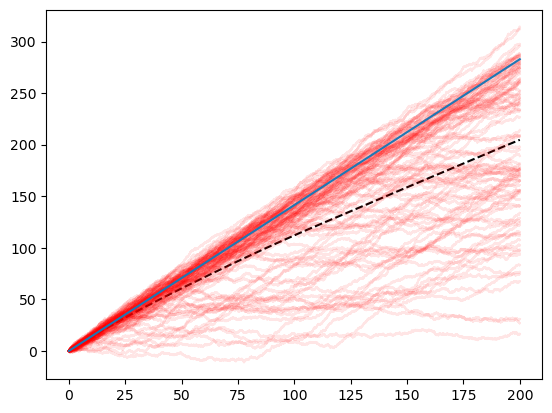

In [206]:
plt.plot(t, 2*np.sqrt(Gamma)*np.cumsum(n2_e)*dt, color='k', linestyle='--')
plt.plot(t, J[:100].T, color='r', alpha=0.1)
plt.plot(t, K*t)

plt.show()

In [211]:
# Get first hitting times
inds = np.array([get_first_hit(mi, 200) for mi in J])
inds = inds[inds != None]

# Get first hitting times
hitting_times = t[list(inds)]
m_tau = np.mean(hitting_times)
s_tau = np.std(hitting_times)

print((m_tau/s_tau)**2)
print(K*m_tau)

66.73624549207389
214.812666542942


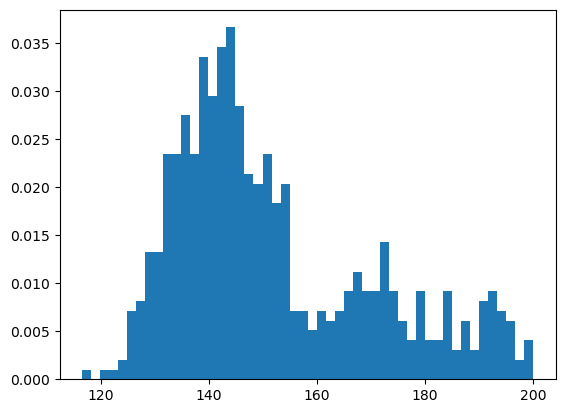

In [212]:
plt.hist(hitting_times, bins=50, density=True)
plt.show()

In [158]:
K

1.3331048747642158